<a href="https://colab.research.google.com/github/sai1272/CAR-PRICING-PREDICTION-WITH-MACHINE-LEARNING/blob/main/SPAM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT NECCESARY LIBRAIES

In [3]:
import pandas as pd   # Handling and processing data in table foramat
import numpy as np    # Numerical opreations
import matplotlib.pyplot as plt # visualization
import seaborn as sns            # Visualization
from sklearn.model_selection import train_test_split # split the data into traing and testing sets
from sklearn.linear_model import LinearRegression    # Implementslinear Regressions
from sklearn.metrics import mean_squared_error,r2_score   # model performs and target variable is explained by model

LOAD THE DATA SET

In [6]:
df=pd.read_csv("/content/SPAM text message 20170820 - Data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df["Category"].unique() # this column as ham and spam are there

array(['ham', 'spam'], dtype=object)

CHECK NULL VALUES

In [10]:
df.isnull().sum() # check null values,no,null values is there

,0
Category,0
Message,0


VISUALIZATION

<Axes: xlabel='Category', ylabel='count'>

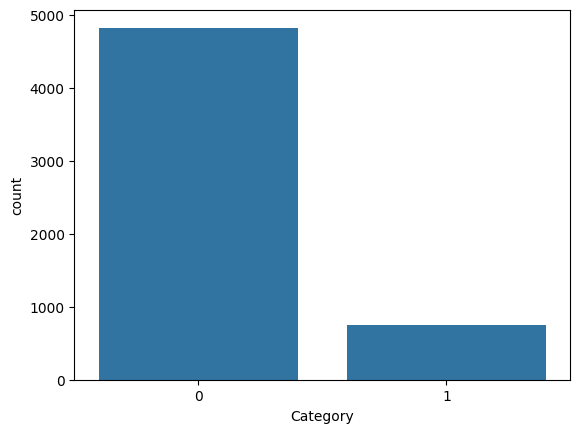

In [15]:
sns.countplot(x=df["Category"])

The above graph shows count the ham and spam
spam count is less nearly 1000
ham count is more nearly 5000

<Axes: xlabel='Category', ylabel='Count'>

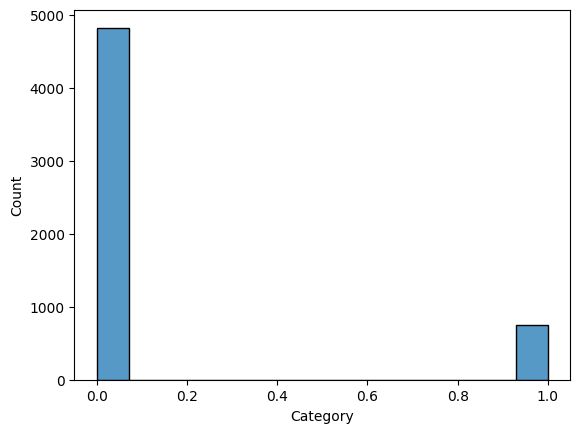

In [16]:
sns.histplot(x=df["Category"])

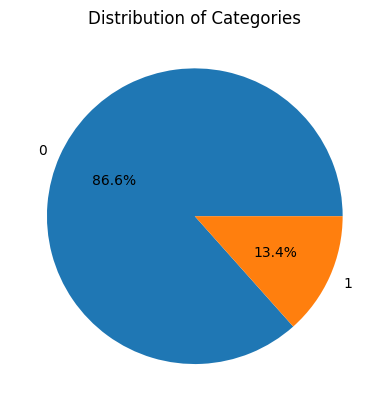

In [20]:
category_counts = df['Category'].value_counts()

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

CONVERT THE TEXT TO NUMBERS

In [13]:
# Machine learning works better with numbers, so we convert:ham → 0,spam → 1
df["Category"]=df["Category"].map({'ham':0,'spam':1})

SPLIT INTO TRAINING AND TESTING

In [22]:
# We divide the data:

# 1) 80% for training the model

# 2) 20% for testing how well it works

x_train,x_test,y_train,y_test=train_test_split(df["Message"],df["Category"],test_size=0.2,random_state=42)



CONVERT TEXT TO NUMBERS


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform training data
X_train_tfidf = vectorizer.fit_transform(x_train)  # Assuming x_train is your training data

# Transform testing data
X_test_tfidf = vectorizer.transform(x_test)  # Assuming x_test is your testing data

TRAIN A  MODEL(NAIVE BAYES)

In [25]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

#We use Naive Bayes, which works well for text classification.

MultinomialNB()

PREDICT AND EVALUATE


In [26]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# We check how well the model performs:

# Accuracy: how many predictions were correct

# Classification report: shows precision, recall, and F1-score for spam and ham




Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115

